In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Salary Data Overview

In [2]:
salary_df = pd.read_csv("../data/Salary_Data.csv")
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
salary_df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
salary_df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 444
dtype: int64

## Salary Data Cleaning

### Remove duplicate rows

In [6]:
#"inplace= True" means saving the data
salary_df.drop_duplicates(inplace = True)
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


### Remove rows with null values

In [7]:
salary_df.dropna(inplace = True)

### Replacing all instances of "Master's" with "Master's Degree", "Bachelor's" with "Bachelor's Degree", "phD" with "PhD" because of its inconsistency in the "Education Level" Column.


In [8]:
salary_df["Education Level"] = salary_df["Education Level"].str.replace("Degree", "")
salary_df["Education Level"] = salary_df["Education Level"].str.strip()
salary_df["Education Level"] = salary_df["Education Level"].str.replace("Master's", "Master's Degree")
salary_df["Education Level"] = salary_df["Education Level"].str.replace("Bachelor's", "Bachelor's Degree")
salary_df["Education Level"] = salary_df["Education Level"].str.replace("phD", "PhD")

salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


### Resetting the index

In [9]:
salary_df = salary_df.reset_index(drop= True)
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
1782,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
1783,27.0,Male,High School,Sales Manager,2.0,40000.0
1784,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
1785,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


## Derivation of Insights

### Creating Age Group column for better visualization of age insights.

In [10]:
# Create the age bins
bins = [20, 30, 40, 50, 60, 70]  # Specify the age bin boundaries

# Create labels for the age bins
labels = ['20-29', '30-39', '40-49', '50-59', '60-62']  # Assign labels to the age bins

# Create a new column 'Age Group' based on the age bins
salary_df['Age Group'] = pd.cut(salary_df['Age'], bins=bins, labels=labels, right=False)

# Group the data by the 'Age Group' column and count the number of workers in each group
age_group_counts = salary_df.groupby('Age Group').size()

print(age_group_counts)

Age Group
20-29    546
30-39    724
40-49    401
50-59    110
60-62      6
dtype: int64


### Age Group column has been added

In [11]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age Group
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,30-39
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,20-29
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,40-49
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,30-39
4,52.0,Male,Master's Degree,Director,20.0,200000.0,50-59
...,...,...,...,...,...,...,...
1782,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0,40-49
1783,27.0,Male,High School,Sales Manager,2.0,40000.0,20-29
1784,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0,30-39
1785,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,30-39


In [12]:
age_salary = salary_df[['Age Group', 'Salary']].groupby("Age Group").mean().sort_values(by="Salary")
age_salary

,Salary
Age Group,
20-29,66677.393773
30-39,111271.430939
40-49,158713.847880
50-59,186250.272727
60-62,193805.166667


### Bar Chart for Age Group against Salary - On average, Older workers earn more than the younger workers.

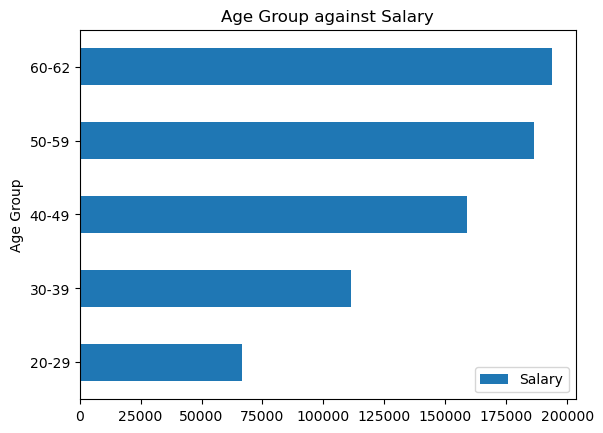

In [13]:
age_salary.plot(kind="barh")
plt.title("Age Group against Salary")
plt.show()

In [14]:
age_xp = salary_df[['Age Group', 'Years of Experience']].groupby("Age Group").mean().sort_values(by="Years of Experience")
age_xp

,Years of Experience
Age Group,
20-29,2.630037
30-39,7.864641
40-49,16.356608
50-59,22.990909
60-62,24.000000


### Bar Chart for Age Group against Years of Experience - On average, Older workers have more experience than the younger workers.

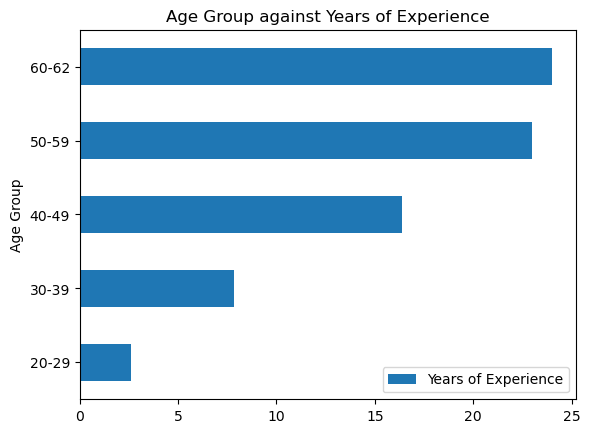

In [15]:
age_xp.plot(kind="barh")
plt.title("Age Group against Years of Experience")
plt.show()

#### Getting the frequency of each gender

In [16]:

gender_freq = salary_df["Gender"].value_counts()
male_freq = gender_freq["Male"]
female_freq = gender_freq["Female"]
other_freq = gender_freq["Other"]

# Putting the values in a dataframe
gender_table = pd.DataFrame({
"Gender": ["Male", "Female", "Other"],
    "Frequency": [male_freq, female_freq, other_freq]
})
gender_table

,Gender,Frequency
0,Male,966
1,Female,814
2,Other,7


## Gender pie chart showing the frequency of each gender

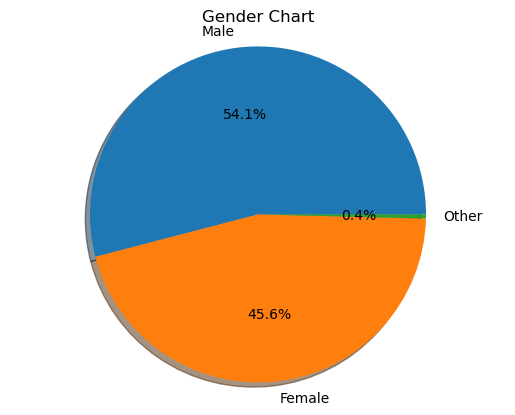

In [17]:
my_labels = ["Male", "Female", "Other"]
plt.pie(gender_table['Frequency'], labels=my_labels, autopct='%1.1f%%', shadow= True)
plt.axis('equal')
plt.title('Gender Chart')
plt.show()

## Gender - Which gender earns the most?
### On average, workers who identify as "Other" earn the most, have the most experience, and are the oldest, followed by Male workers, and Female workers having the least pay, experience and age. Observe Table  and Chart below.

In [18]:
gender_salary = salary_df[["Gender", "Salary"]].groupby("Gender").mean().sort_values("Salary", ascending=False)
gender_xp = salary_df[["Gender", "Years of Experience"]].groupby("Gender").mean().sort_values("Years of Experience", ascending=False)
gender_age = salary_df[["Gender", "Age"]].groupby("Gender").mean().sort_values("Age", ascending=False)


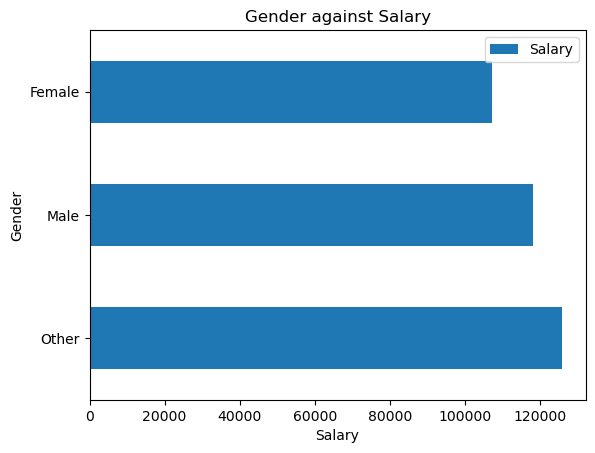

In [19]:
gender_salary.plot(kind= "barh")
plt.title("Gender against Salary")
plt.xlabel("Salary")
plt.show()

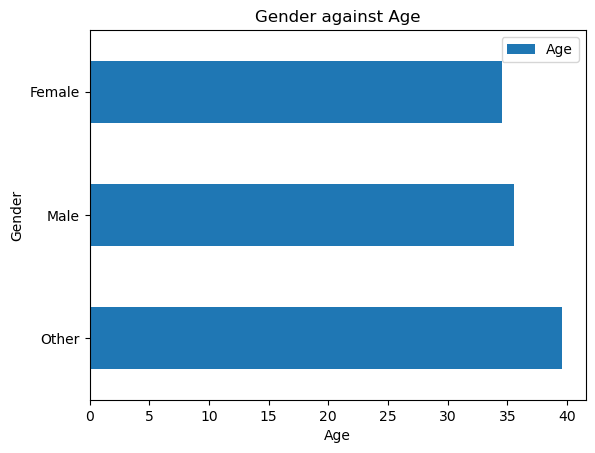

In [20]:
gender_age.plot(kind= "barh")
plt.title("Gender against Age")
plt.xlabel("Age")
plt.show()

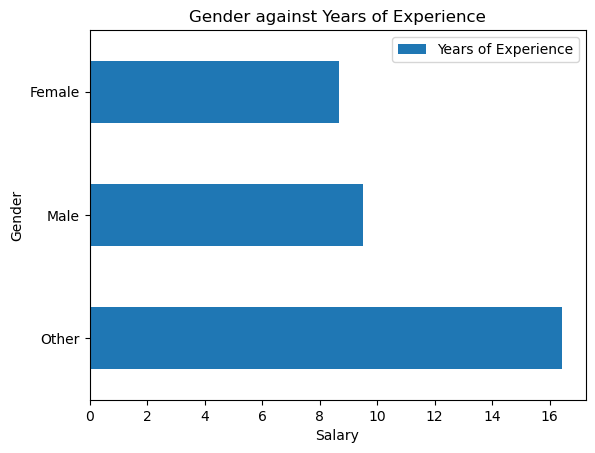

In [21]:
gender_xp.plot(kind= "barh")
plt.title("Gender against Years of Experience")
plt.xlabel("Salary")
plt.show()

### 6 out of the 7 workers who identified as "Other" have only attained a High School degree.

In [22]:
salary_df[salary_df["Gender"].str.contains("Other")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age Group
721,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,50-59
728,25.0,Other,High School,Full Stack Engineer,2.0,69032.0,20-29
749,37.0,Other,Master's Degree,Full Stack Engineer,14.0,161393.0,30-39
791,31.0,Other,High School,Back end Developer,8.0,104127.0,30-39
797,23.0,Other,High School,Front end Developer,2.0,62852.0,20-29
817,54.0,Other,High School,Senior Software Engineer,29.0,158254.0,50-59
967,54.0,Other,High School,Senior Software Engineer,29.0,158966.0,50-59


#### Getting the frequency of each education level

In [23]:

education_freq = salary_df["Education Level"].value_counts()
phd_freq = education_freq["PhD"]
master_freq = education_freq["Master's Degree"]
bachelor_freq = education_freq["Bachelor's Degree"]
high_freq = education_freq["High School"]

# Putting the values in a dataframe
education_table = pd.DataFrame({
"Education Level": ["PhD", "Master's Degree", "Bachelor's Degree", "High School"],
    "Frequency": [phd_freq, master_freq, bachelor_freq, high_freq]
})
education_table

,Education Level,Frequency
0,PhD,341
1,Master's Degree,568
2,Bachelor's Degree,768
3,High School,110


## Education Level pie chart showing the frequency of each Education Level

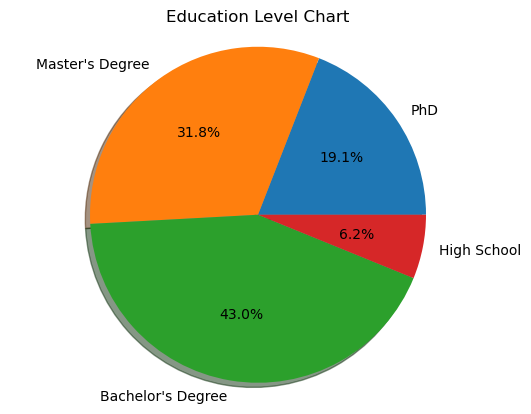

In [24]:
# Making the gender pie chart
my_labels = ["PhD", "Master's Degree", "Bachelor's Degree", "High School"]
plt.pie(education_table['Frequency'], labels=my_labels, autopct='%1.1f%%', shadow= True)
plt.axis('equal')
plt.title('Education Level Chart')
plt.show()

## Education Level
### On average, PhD holders earn the most, have the most experience, and are the oldest, followed by Master's, Bachelor's, and High School having the least pay, experience and age. Observe Table below.

In [25]:
edu_salary = salary_df[["Education Level", "Salary"]].groupby("Education Level").mean().sort_values("Salary", ascending=False)
edu_age = salary_df[["Education Level", "Age"]].groupby("Education Level").mean().sort_values("Age", ascending=False)
edu_xp = salary_df[["Education Level", "Years of Experience"]].groupby("Education Level").mean().sort_values("Years of Experience", ascending=False)


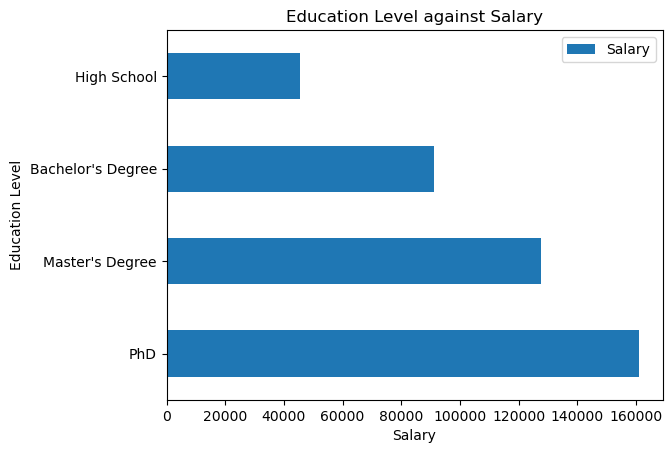

In [26]:
edu_salary.plot(kind= "barh")
plt.title("Education Level against Salary")
plt.xlabel("Salary")
plt.show()

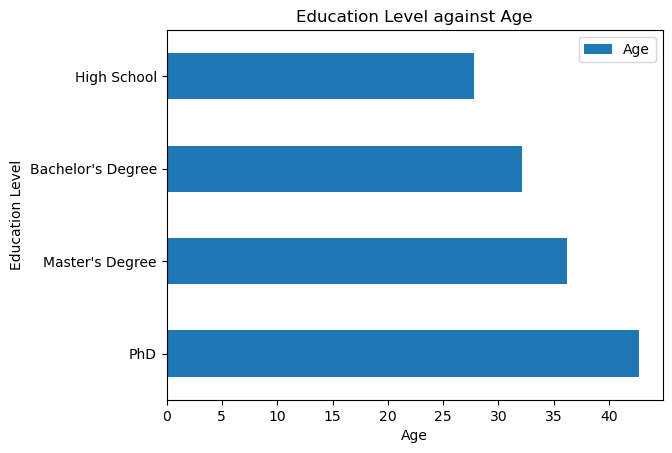

In [27]:
edu_age.plot(kind= "barh")
plt.title("Education Level against Age")
plt.xlabel("Age")
plt.show()

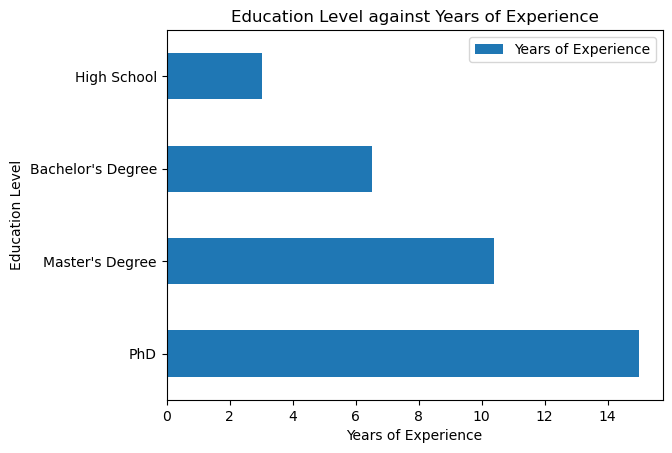

In [28]:
edu_xp.plot(kind= "barh")
plt.title("Education Level against Years of Experience")
plt.xlabel("Years of Experience")
plt.show()

In [29]:
salary_df["Job Title"].value_counts()



Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Financial Advisor              1
Junior Designer                1
Chief Technology Officer       1
Technical Recruiter            1
Delivery Driver                1
Name: Job Title, Length: 191, dtype: int64

In [30]:
job_titles = salary_df["Job Title"].unique().tolist()
job_titles

['Software Engineer',
 'Data Analyst',
 'Senior Manager',
 'Sales Associate',
 'Director',
 'Marketing Analyst',
 'Product Manager',
 'Sales Manager',
 'Marketing Coordinator',
 'Senior Scientist',
 'Software Developer',
 'HR Manager',
 'Financial Analyst',
 'Project Manager',
 'Customer Service Rep',
 'Operations Manager',
 'Marketing Manager',
 'Senior Engineer',
 'Data Entry Clerk',
 'Sales Director',
 'Business Analyst',
 'VP of Operations',
 'IT Support',
 'Recruiter',
 'Financial Manager',
 'Social Media Specialist',
 'Software Manager',
 'Junior Developer',
 'Senior Consultant',
 'Product Designer',
 'CEO',
 'Accountant',
 'Data Scientist',
 'Marketing Specialist',
 'Technical Writer',
 'HR Generalist',
 'Project Engineer',
 'Customer Success Rep',
 'Sales Executive',
 'UX Designer',
 'Operations Director',
 'Network Engineer',
 'Administrative Assistant',
 'Strategy Consultant',
 'Copywriter',
 'Account Manager',
 'Director of Marketing',
 'Help Desk Analyst',
 'Customer Servic

## Job Title - Salary
### On average, CEOs & CTOs earn the most, Junior Business Operations Analysts have the least pay. Observe Table and Chart below.

In [31]:
job_salary = salary_df[["Job Title", "Salary"]].groupby("Job Title").mean().sort_values("Salary", ascending=False)
job_salary

,Salary
Job Title,
CEO,250000.0
Chief Technology Officer,250000.0
Chief Data Officer,220000.0
VP of Finance,200000.0
Director of Data Science,200000.0
...,...
Juniour HR Coordinator,32000.0
Junior Sales Associate,28080.0
Delivery Driver,28000.0


### Top 3 highest paying Job Titles

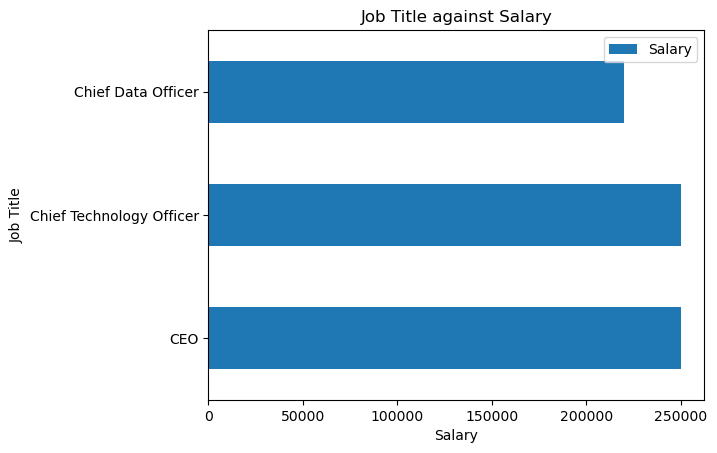

In [32]:
job_salary.head(3).plot(kind= "barh")
plt.title("Job Title against Salary")
plt.xlabel("Salary")
plt.show()

### Bottom 3 highest paying Job Titles

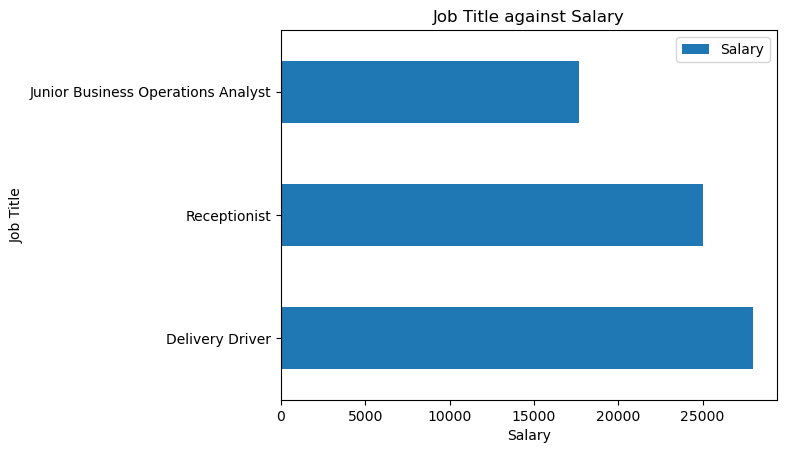

In [33]:
job_salary.tail(3).plot(kind= "barh")
plt.title("Job Title against Salary")
plt.xlabel("Salary")
plt.show()

## Job Title - Age
### On average, Directors & CTOs are the oldest and, Receptionists are the youngest. Observe Table and Charts below.

In [34]:
job_age = salary_df[["Job Title", "Age"]].groupby("Job Title").mean().sort_values("Age", ascending=False)
job_age

,Age
Job Title,
Director,52.0
Chief Technology Officer,52.0
Director of Human Resources,51.0
Supply Chain Analyst,50.0
CEO,50.0
...,...
Help Desk Analyst,25.0
Juniour HR Coordinator,24.5
Junior Developer,24.0


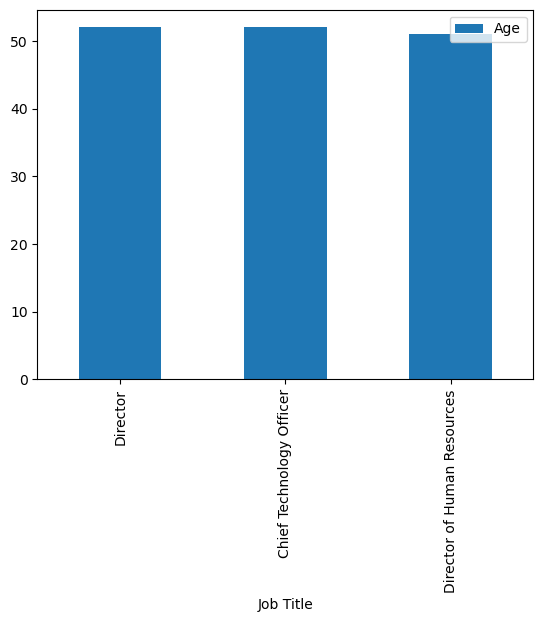

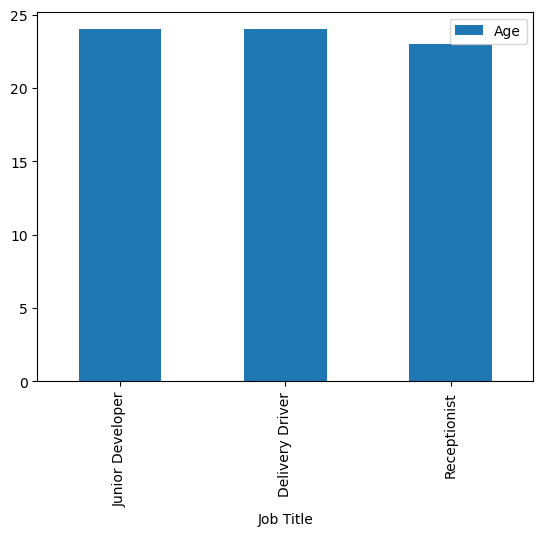

In [35]:
job_age.head(3).plot(kind= "bar")
job_age.tail(3).plot(kind= "bar")
plt.show()

## Job Title - Years of Experience
### On average, CEOs & CTOs have the most experience, Receptionists, Data Entry Clerks, Delivery Drivers, and Help Desk Analysts have the least experience. Observe Table below.

In [36]:
job_xp = salary_df[["Job Title", "Years of Experience"]].groupby("Job Title").mean().sort_values("Years of Experience", ascending=False)
job_xp

,Years of Experience
Job Title,
CEO,25.0
Chief Technology Officer,24.0
Supply Chain Analyst,22.0
Director of Sales and Marketing,22.0
Director of Human Resources,22.0
...,...
Juniour HR Coordinator,1.0
Receptionist,0.0
Data Entry Clerk,0.0


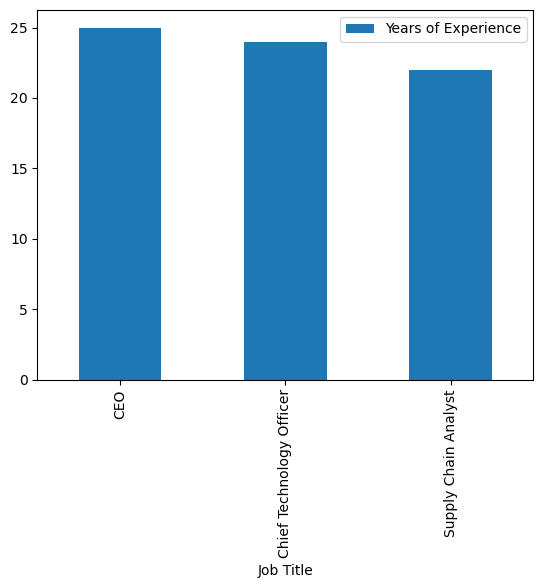

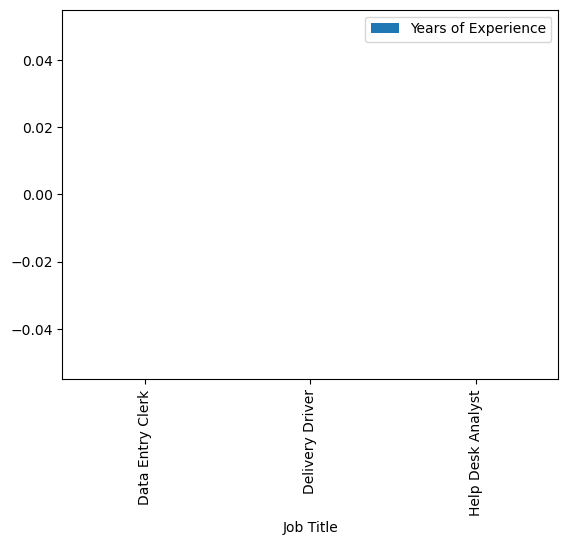

In [37]:
job_xp.head(3).plot(kind= "bar")
job_xp.tail(3).plot(kind= "bar")
plt.show()

### From the Age distribution below, we can say that: The majority of the workers in the dataset are within the age range of 25 to 35 years old. The minority of the workers in the dataset are within the age range of 50 to 62 years old. The mean age is 35. The mode age is 29.

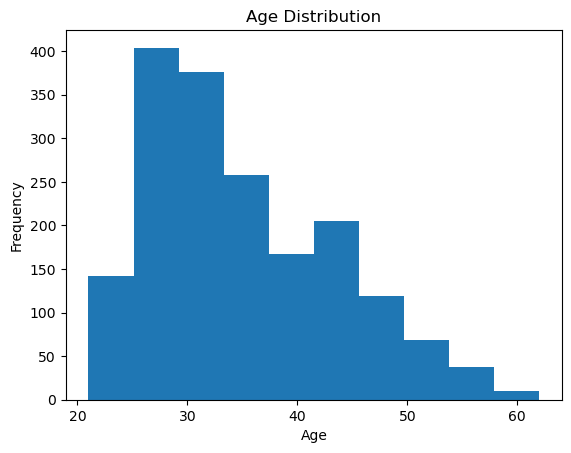

In [38]:
# Distribution for Age of Workers because Age is a numerical variable
import matplotlib.pyplot as plt
salary_df["Age"].plot(kind= "hist")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
# plt.grid(axis = 'x')
plt.show()

### Correlation Table Supporting findings above.

In [39]:
salary_df.corr()

C:\Users\olami\AppData\Local\Temp\ipykernel_22132\214869978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary_df.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.936260,0.766841
Years of Experience,0.936260,1.000000,0.818725
Salary,0.766841,0.818725,1.000000


## Saving clean data

In [40]:
clean_data = pd.DataFrame(salary_df)
clean_data.to_csv("../data/Clean_Salary_Data.csv")

# Building Simple Decision Tree Model

### Select Data for Modelling

In [42]:
clean_data = "../data/Clean_Salary_Data.csv"
model_data = pd.read_csv(clean_data)
model_data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Age Group'],
      dtype='object')

### Selecting The Prediction Target or response variable

In [43]:
y = model_data.Salary

### Choosing "Features" or predictors or predictor variables

In [44]:
features = ['Age', 'Years of Experience']

In [45]:
X = model_data[features]

In [46]:
X.describe()

,Age,Years of Experience
count,1787.000000,1787.000000
mean,35.139899,9.156128
std,8.213045,6.844924
min,21.000000,0.000000
25%,29.000000,3.000000
50%,33.000000,8.000000
75%,41.000000,13.000000
max,62.000000,34.000000


In [47]:
X.head()

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0


### Building Your Model

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
salary_model = DecisionTreeRegressor(random_state=1)

# Fit or train model
salary_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [49]:
print("Making salary predictions for the following 5 workers:\n")
print(X.head())
print("\nThe predictions are")
print(salary_model.predict(X.head()))

Making salary predictions for the following 5 workers:

    Age  Years of Experience
0  32.0                  5.0
1  28.0                  3.0
2  45.0                 15.0
3  36.0                  7.0
4  52.0                 20.0

The predictions are
[ 90000.          69903.59259259 158750.          92500.
 200000.        ]


In [50]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age Group
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,30-39
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,20-29
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,40-49
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,30-39
4,52.0,Male,Master's Degree,Director,20.0,200000.0,50-59


### Model Validation - Mean Absolute Error...... error = actual - predicted

In [51]:
from sklearn.metrics import mean_absolute_error

salary_prediction = salary_model.predict(X)
mean_absolute_error(y, salary_prediction)

15121.047743074709

#### Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

In [52]:
from sklearn.model_selection import train_test_split

# split data into training and tetsing/validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 0)
salary_model = DecisionTreeRegressor()
salary_model.fit(train_X, train_y)

# get predicted salaries on validation data
val_prediction = salary_model.predict(val_X)
print(mean_absolute_error(val_y, val_prediction))

18845.04509150801


#### The mean absolute error for the in-sample data was about 15,000 dollars. Out-of-sample it is more than 18,845 dollars.

## To overcome Overfitting and Underfitting problem, max_leaf_node

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    salary_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    salary_model.fit(train_X, train_y)
    val_prediction = salary_model.predict(val_X)
    mae = mean_absolute_error(val_y, val_prediction)
    return(mae)

In [54]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [8, 80, 800, 8000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
#     print(f"Max leaf nodes: {max_leaf_nodes}  \t\t Mean Absolute Error:  {my_mae}")

Max leaf nodes: 8  		 Mean Absolute Error:  19792
Max leaf nodes: 80  		 Mean Absolute Error:  18538
Max leaf nodes: 800  		 Mean Absolute Error:  18849
Max leaf nodes: 8000  		 Mean Absolute Error:  18849


### Using a Random Forest Model because of the Decision Tree's fallbacks

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [56]:
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_X, train_y)

forest_pred = forest_model.predict(val_X)
print(mean_absolute_error(val_y, forest_pred))

18452.857811067504


#### We can observe that the MAE using DecisionTree was 18827, and the MAE using Random Forest was 18452. A difference close to 400.

## Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(train_X, train_y)

reg_pred= reg_model.predict(val_X)
print(mean_absolute_error(val_y, reg_pred))

23036.127101861824


In [58]:
model_data.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000,1787.000000
mean,893.000000,35.139899,9.156128,113184.659765
std,516.006783,8.213045,6.844924,51596.536766
min,0.000000,21.000000,0.000000,350.000000
25%,446.500000,29.000000,3.000000,70000.000000
50%,893.000000,33.000000,8.000000,110000.000000
75%,1339.500000,41.000000,13.000000,160000.000000
max,1786.000000,62.000000,34.000000,250000.000000
